In [1]:
import seaborn as sns
import os
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
rt_file = '/shared/2/projects/framing/results/frame_setting/retweets_12-17-20.tsv'
fav_file = '/shared/2/projects/framing/results/frame_setting/favorites_12-17-20.tsv'


In [21]:
df_rt = pd.read_csv(rt_file,sep='\t')
df_fav = pd.read_csv(fav_file,sep='\t')

In [275]:
df_rt['Reaction'] = 'retweets'
df_fav['Reaction'] = 'favorites'

In [276]:
issue_general_frames = ['Capacity and Resources','Crime and Punishment', 'Cultural Identity', 'Economic',
                        'External Regulation and Reputation', 'Fairness and Equality',
                        'Health and Safety', 'Legality, Constitutionality, Jurisdiction',
                        'Morality and Ethics', 'Policy Prescription and Evaluation',
                        'Political Factors and Implications', 'Public Sentiment',
                        'Quality of Life', 'Security and Defense']
issue_specific_frames = ['Threat: Fiscal','Threat: Jobs', 'Threat: National Cohesion', 'Threat: Public Order',
                         'Victim: Discrimination', 'Victim: Global Economy','Victim: Humanitarian', 'Victim: War',
                         'Hero: Cultural Diversity', 'Hero: Integration','Hero: Worker']
is_combined_frames = ['Hero','Victim','Threat']
narrative_frames = ['Episodic','Thematic']
frames = {}
frames['Issue-Specific'] = [s.replace(' ','.').replace(':','.') for s in issue_specific_frames]
frames['Issue-General'] = [s.replace(' ','.').replace(':','.') for s in issue_general_frames]
frames['Narrative'] = narrative_frames
frames['Issue-Specific-Combined'] = is_combined_frames

In [277]:

df_rt_lib = df_rt[df_rt['term'].str.contains('liberal')]
df_fav_lib = df_fav[df_fav['term'].str.contains('liberal')]
df_rt_cons = df_rt[df_rt['term'].str.contains('conservative')]
df_fav_cons = df_fav[df_fav['term'].str.contains('conservative')]

In [278]:
df_rt_lib['Ideology'] = 'liberal'
df_fav_lib['Ideology'] = 'liberal'
df_rt_cons['Ideology'] = 'conservative'
df_fav_cons['Ideology'] = 'conservative'

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [279]:
df = pd.concat([df_rt_lib,df_rt_cons,df_fav_lib,df_fav_cons])

In [280]:
all_terms = list(df['term'])
l = [x.split(':')[0] for x in all_terms]
df['Frame'] = l
df = df.drop(columns = ['term'])
df = df[df['Frame'] != 'Capacity.and.Resources0']
df['Frame'] = [x[:-1] for x in list(df['Frame'])]

In [284]:
df

,estimate,std.error,statistic,group,Reaction,Ideology,Frame
42,0.011615,0.008525,1.362417,fixed,retweets,liberal,Capacity.and.Resources
44,0.004514,0.003848,1.173068,fixed,retweets,liberal,Crime.and.Punishment
46,-0.012488,0.004375,-2.854772,fixed,retweets,liberal,Cultural.Identity
48,0.010582,0.004042,2.617809,fixed,retweets,liberal,Economic
50,-0.003317,0.003681,-0.901147,fixed,retweets,liberal,Episodic
...,...,...,...,...,...,...,...
85,0.055746,0.005029,11.083890,fixed,favorites,conservative,Threat..Public.Order
87,-0.028027,0.008195,-3.419837,fixed,favorites,conservative,Victim..Discrimination
89,0.026538,0.025232,1.051759,fixed,favorites,conservative,Victim..Global.Economy
91,-0.026877,0.008598,-3.126066,fixed,favorites,conservative,Victim..Humanitarian


In [285]:
def plot(df,reaction,frame_type,out_file=None):
    df = df[df['Frame'].isin(frames[frame_type])]
    df = df[df['Reaction']==reaction]
    df = df.sort_values(['estimate'],ascending=False)
    sns.catplot(x='estimate',y='Frame',kind='bar',data=df,aspect=1.5,
                palette='colorblind',hue='Ideology',hue_order=['liberal','conservative'],dodge=True)    
    err_pos = sorted([i - 0.2 for i in range(int(len(df)/2))] + [i+0.2 for i in range(int(len(df)/2))])
    plt.axvline(0,color='black')
    
    frame_order = []
    errors = []
    estimates = []
    for frame in list(df['Frame']):
        if frame not in frame_order:
            frame_order.append(frame)
    for frame in frame_order: 
        errors += list(df.loc[(df['Frame']==frame)&(df['Reaction']==reaction)]
                       .sort_values('Ideology',ascending=False)['std.error'])
        estimates += list(df.loc[(df['Frame']==frame)&(df['Reaction']==reaction)]
                       .sort_values('Ideology',ascending=False)['estimate'])
        
    
    plt.errorbar(x = estimates,y=err_pos,xerr=errors,fmt = 'none',color='black')

    plt.title(f'Change in {reaction} of {frame_type} frames based on author ideology')
    plt.xlabel(r'$\longleftarrow$ Fewer reactions                                   More reactions $\longrightarrow$')
    if out_file != None:
        plt.savefig(out_file,bbox_inches='tight')
    plt.show()

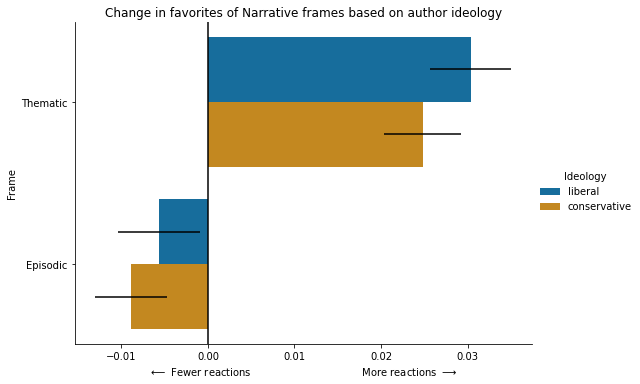

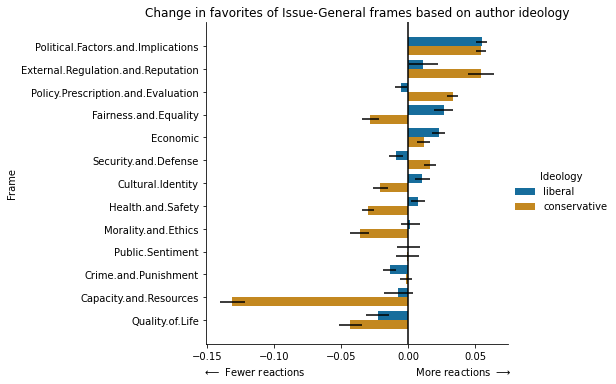

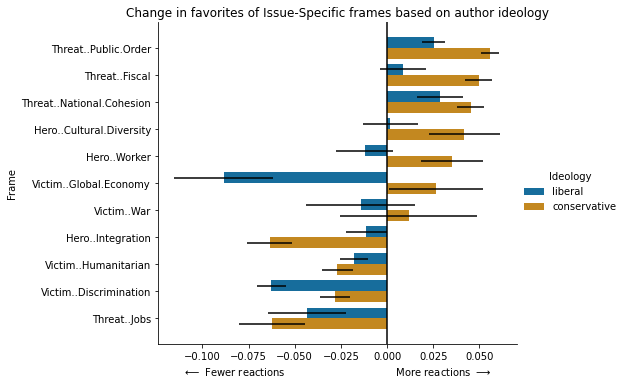

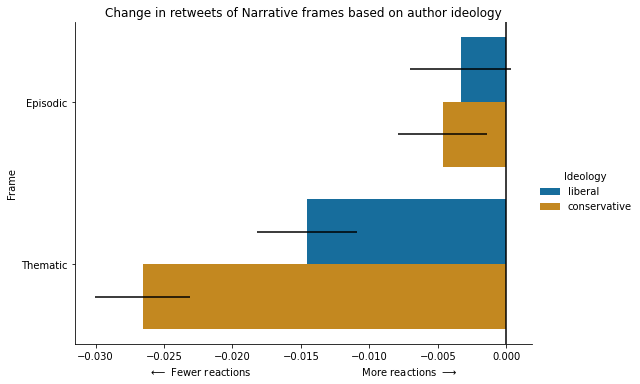

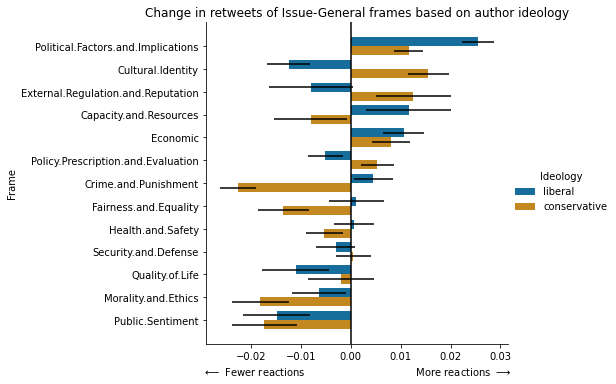

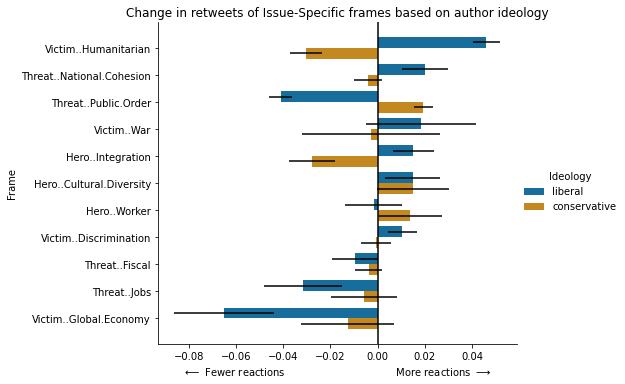

In [289]:
for reaction in ['favorites','retweets']:
    for frame_type in ['Narrative','Issue-General','Issue-Specific']:
        out_file = f'/shared/2/projects/framing/results/frame_setting/{reaction}_{frame_type}_by_ideology_12-17-20.pdf'
        plot(df,reaction,frame_type,out_file=out_file)